In [11]:
def plot(x, y, **kwargs):
    import matplotlib.pyplot as plt
    def add_shit(**kwargs_add):
        print(kwargs_add)
        plt.annotate(**kwargs_add)
    if 'kwargs_add' in kwargs:
        kwargs_add = kwargs.pop('kwargs_add')
        print(kwargs.keys())
        plt.plot(x, y, **kwargs)
        add_shit(**kwargs_add)
        plt.legend()
    else:
        plt.plot(x, y, **kwargs)
        plt.legend()

dict_keys(['color', 'linewidth', 'label'])
{'text': 'my point', 'xy': (0, 0)}


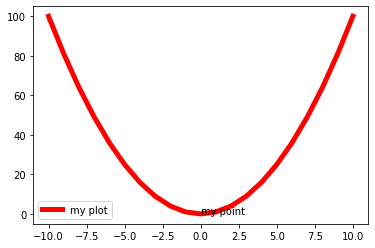

In [12]:
import numpy as np

x = np.arange(-10,11,1)
y = x**2
kwargs = {'color': 'red', 'linewidth': 5.0, 'label': 'my plot', 'kwargs_add': {'text': 'my point', 'xy': (0,0)}}
plot(x, y, **kwargs)

In [44]:
dic = {'a': [1,2,3], 'b': 2, 'c': 3}
a = dic.pop('a', None)
d = dic.pop('d', None)

In [45]:
type(a)

list

In [40]:
d

In [41]:
type(d)

NoneType

In [47]:
if type(dic) == dict:
    print('yuh')

yuh


In [50]:
def print_things(filename = None, **kwargs):
    
    def print_filename(filename, text, **kwargs, **my_args):
        print(filename, text)
        print(my_list)
    def do_stw_filename(filename, funny = None, **my_args):
        print(funny)
        print(filename)
    if filename is not None:
        if type(kwargs.pop('my_args', None)) == dict:
            
            my_args = kwargs.pop('my_args', None)
            print_filename(filename, **kwargs)
            do_stw_filename(filename, **my_args)
        else:
            print_filename(filename, **kwargs)
#             do_stw_filename(filename, **my_args)
    else:
        print('oof')

In [51]:
my_args = {'funny': 'this is funny', 'my_list': [1,2,3]}
kwargs = {'filename': 'this_file', 'text': 'this is the filename'}
print_things(**kwargs)

this_file this is the filename


In [1]:
def some_rad_science(filename = None, modify_solar = False, ratios = True, **reading_func_args):
    """
    Dictates stellar abundances used in calculating ion balances.
    If filename = None, solar abundances will be used. None is the default.
    Modify_solar = False is the default:
    If modify_solar = False, will return data input as a dictionary. Only those elements    and values provided will be
    used in calculating ion balances. 
If modify_solar = True, switch out element values provided with solar abundances for those elements and provide
full dictionary of first 30 elements in periodic table having modified abundances provided by data. All else is same
Ratios = True is the default:
If ratios = False, data values will not be changed.
If ratios = True, data values will be adjusted to accomodate chemical abundance ratios (see def fix_elements, 
which is called in def find_elements)
Right now, only works with datasets able to be read in as a pandas dataframe (see            read_filetype doc string)
    """
    def read_filetype(filename, what_filetype = False, **kwargs):  
        """
    loads data into pandas dataframe
    accaptable filetypes: 
    --> csv, txt, ods, odt, xls, xlsx, xlsm, xlsb, odf, html, fwf, json, orc, h5, hdf5
        """ 
        import pandas as pd
        if what_filetype is not False: #may not even need this but she's here lolololol
            print('accaptable filetypes: csv, txt, ods, odt, xls, xlsx, xlsm, xlsb, odf, 			   html, fwf, json, orc, h5, hdf5')
        path, extension = filename.split('.')
        if '/' in path:
            path_list = filename.split('/')
            name = path_list[-1]
            print('path was given. name is {}'.format(name))
        else:
            name = filename
            print('only filename was given. name is {}'.format(name))
        if extension == 'csv' or extension == 'txt':
            data = pd.read_csv(name, **kwargs)
        if extension == 'ods' or extension == 'odt' or extension == 'xls' or extension == 		'xlsx' or extension == 'xlsm' or extension == 'xlsb' or extension == 'odf':
            data = pd.read_excel(name, **kwargs)
        if extension == 'html':
            data = pd.read_html(name, **kwargs)
        if extension == 'fwf':
            data = pd.read_fwf(name, **kwargs)
        if extension == 'json':
            data = pdread_json(name, **kwargs)
        if extension == 'orc':
            data = pd.read_orc(name, **kwargs)
        if extension == 'h5' or extension == 'hdf5':
            assert '/' in path, 'pandas hdf reader requires filepath'
            data = pd.read_hdf(filename, **kwargs)
        return data
 
    def fix_elements(data): #technically newest_data
        """
    calculates abundance ratios for star/thing that we care about given a dataset
    keys have already been fixed using fix_key for indexing and matching to solar_abundance
        """
        print('Made it to fix_elements in reading_func')
        g1 = data['Fe/H'] #g1, for given data value #1 -- number density of iron to hydrogen 			    of star/thing we care about
        s1 = really_cool_numbers['Fe'] #s1, for solar data value #1 -- number density of iron to 				     hydrogen of Sun
        t1 = s1*(10**g1)
        dic = {}
        dic['Fe'] = t1
        for key in really_cool_numbers.keys():
            if key in data.keys():
                if key == "Fe": # since we have already fixed the keys to match keys of 					   SolAb, this should work
                    pass
                else:
                    t2 = (really_cool_numbers[key] / s1) * (10**data[key])
                    T = t1 * t2
                    dic[key] = T
        return dic
    def fix_key(data): 
        """
        amends element keys to ensure they match that of solar 
        abundances dictionary for indexing/comparing purposes
        Handy for data given in ratios 
        Returns new dictionary with updated keys and unchanged elements
        """
        """
        convert data to dictionary and ensure each entry is a float and not a list
        """
        new_data = data.to_dict(orient='list') 
        for i in new_data:
            new_data[i] = sum(new_data[i])
        """
        Make list of keys from data dictionary
        """ 
        keys = list(new_data.keys())
        string = []
        for i in keys:
            if len(i) == 1 or i[1] == '/':
                string.append(i[0])
            else:
                string.append(i[0] + i[1])
        """
        Make new dictionary with new keys and unchanged elements
        """
        newest_data = {}
        for key, i in zip(new_data.keys(), string):
            newest_data[i] = new_data[key]
        return newest_data
    
    def find_elements(filename, really_cool_numbers, modify_solar = False, ratios = True,    **reading_func_args):
        """
        fixes keys to be consistent with format of keys in solar_abundance

        If modify_solar = False:
        if ratios = False:
        -No values are changed. Returns a dictionary of data provided to be passed to 		 ion_balance. 
        if ratios = True:
        -fix_elements is called. Returns a dictionary of corrected ratios to be passed to 		 ion_balance
        If modify_solar = True:
        if ratios = False:
        -matches keys of data provided with keys of solar_abundance. If a match is found, 		 replaces 
        value in solar_abundance with value in data provided. Returns solar_abundance 		dictionary with updata
        values to pass to ion_balance
        if ratios = True: 
        -fix_elements is called. Uses dictionary of corrected ratios to match keys of fixed 	 data to keys 
        -of solar_abundance. If a match is found, replaces value in solar_abundance with 		 value from 
        -fix_elements dictionary. Returns solar_abundance dictionary with updated values to 	 pass to 
        -ion_balance

        ratios should only be False if data provided has already been corrected 
        """
        print('Made it to find_elements in some_rad_science')
        if type(reading_func_args.pop('kwargs', None)) == dict:
            kwargs = reading_func_args.pop('kwargs', None)
            data = read_filetype(filename, **kwargs) 
        else: 
            data = read_filetype(filename)
        newest_data = fix_keys(data)
        if modify_solar == False:
            if ratios == False:
                adjusted_data = newest_data
            if ratios is not False:
                adjusted_data = fix_elements(newest_data)
            return adjusted_data
        if modify_solar is not False:
            if ratios == False:
                for key in really_cool_numbers.keys():
                    if key in newest_data.keys():
                        really_cool_numbers[key] = newest_data[key]
                        print(f'an element was changed to {really_cool_numbers[key]}')
            if ratios is not False:
                adjusted_data = fix_elements(newest_data)
                for key in really_cool_numbers.keys():
                    if key in adjusted_data.keys():
                        really_cool_numbers[key] = adjusted_data[key]
                        print(f'an element was changed to {really_cool_numbers[key]}')
            return really_cool_numbers

    really_cool_numbers = {
        'H' : 1.00e+00, 'He': 1.00e-01, 'Li': 2.04e-09,
        'Be': 2.63e-11, 'B' : 6.17e-10, 'C' : 2.45e-04,
        'N' : 8.51e-05, 'O' : 4.90e-04, 'F' : 3.02e-08,
        'Ne': 1.00e-04, 'Na': 2.14e-06, 'Mg': 3.47e-05,
        'Al': 2.95e-06, 'Si': 3.47e-05, 'P' : 3.20e-07,
        'S' : 1.84e-05, 'Cl': 1.91e-07, 'Ar': 2.51e-06,
        'K' : 1.32e-07, 'Ca': 2.29e-06, 'Sc': 1.48e-09,
        'Ti': 1.05e-07, 'V' : 1.00e-08, 'Cr': 4.68e-07,
        'Mn': 2.88e-07, 'Fe': 2.82e-05, 'Co': 8.32e-08,
        'Ni': 1.78e-06, 'Cu': 1.62e-08, 'Zn': 3.98e-08}
    if filename is not None:
            really_cool_numbers = find_elements(**reading_func_args)

    return really_cool_numbers
    

In [5]:
def shit(x, y, **kwargs):
    print(x)
    print(y)
    print_more_things(x, y)
def print_more_things(x, y):
    print(x[0])
    print(y[0])
#     print_even_more_things(**kwargs)
def print_even_more_things(a = 0, b = 1, **kwargs):
    print(a)
    print(b)

In [6]:
x = 'ayeeee'
y = 'fuck'
kwargs = {'a':1, 'b':2}
shit(x, y, **kwargs)

ayeeee
fuck
a
f
